In [19]:
import numpy as np, math, copy
import matplotlib.pyplot as plt

# Classes - Grafo e nó

In [20]:
class Graph:
    def __init__(self, *args) -> None:
        self.startingPoint = args[0]
        self.edges = {i.nodeName:i.edgeList for i in args}
        self.nodes, self.touristicPoints = args, [i for i in args if i.isTouristic]
    
class node:
    def __init__(self, nodeName, xCoord, yCoord, timeSpent = 0, isTouristic =  False, previousNode = None) -> None:
        self.nodeName = nodeName
        self.xCoord, self.yCoord = xCoord, yCoord
        self.timeSpent = timeSpent
        self.isTouristic = isTouristic
        self.isVisited = False
        self.previousNode = previousNode
        self.edgeList = {}
        self.realPath = {}
        
    def __repr__(self) -> str:
        return f"\"{self.nodeName}\" at ({self.xCoord}, {self.yCoord})"
    
    def addEdges(self, *args):
        self.edgeList.update({i[0] if isinstance(i, tuple) else 
                              i: i[1] if isinstance(i, tuple) else 1 for i in args})
        
    def getEuclideanDistance(self, other) -> float:
        return math.sqrt((self.xCoord - other.xCoord)**2 + (self.yCoord - other.yCoord)**2)
    
    def getGraphDistance(self, other) -> float:
        if self is other:
            return 0
        
        return self.edgeList.get(other, np.inf)

# Heurística utilizada

In [21]:
def euclideanHeuristic(originNode, destinyNode):
    return originNode.getEuclideanDistance(destinyNode)   

# Algoritmo do A*

In [22]:
def backtrackPath(finalNode):
    path = []
    
    while finalNode:
        path.append(finalNode)
        finalNode = finalNode.previousNode
        
    return path[::-1]

def shortestPath(graph, heuristic, originNode, destinyNode):
    if originNode == destinyNode:
        return originNode, 0
    
    openNodes, closedNodes = [], set()

    currentNode = (node(originNode.nodeName, originNode.xCoord, originNode.yCoord), 0, heuristic(originNode, destinyNode))
    
    openNodes.append(currentNode)
    
    while openNodes:
        closedNodes.add(currentNode[0].nodeName)
        
        if currentNode[0].nodeName == destinyNode.nodeName:
            return backtrackPath(currentNode[0]), currentNode[1]
        
        currentNeighbors = graph.edges[currentNode[0].nodeName]
        
        openNodes.extend([(node(i.nodeName, i.xCoord, i.yCoord, previousNode = currentNode[0], timeSpent = j + currentNode[0].timeSpent), 
        j + currentNode[0].timeSpent, heuristic(i, destinyNode)) for i, j in currentNeighbors.items() if i.nodeName not in closedNodes])
        
        tmpNode = min(openNodes, key = lambda x:(x[1] + x[2]))
        
        if currentNode in openNodes:
            openNodes.remove(currentNode)

        currentNode = tmpNode
        
    return None, np.inf

# Redução de um grafo com pontos turísticos e não turísticos

In [23]:
def reduceGraph(originalGraph):
    touristicPointsCopy = copy.deepcopy([originalGraph.startingPoint] + originalGraph.touristicPoints)
    
    for i in touristicPointsCopy:
        shortestPathList = {node : shortPath for node in touristicPointsCopy if i != node and 
                            (shortPath := shortestPath(graph, euclideanHeuristic, i, node))[1] != np.inf}
        
        i.edgeList = {a:  b[1] for a, b in shortestPathList.items()}
        i.realPath = {a : b[0][1:] for a, b in shortestPathList.items()}
                
    return Graph(*touristicPointsCopy)

# Algoritmo para encontrar a melhor rota

In [24]:
def maxPointsPath(reducedGraph, timeLimit):
    startPoint = reducedGraph.startingPoint
    
    finalPath, currentNode = [startPoint.nodeName], startPoint
    timeSpent = pointsVisited = 0
        
    while (avaiable := [(i, j) for i, j in currentNode.edgeList.items() if not i.isVisited and i != startPoint
                        and j + timeSpent + i.getGraphDistance(startPoint) <= timeLimit]):
        
        currentEdge = min(avaiable, key = lambda x: x[1])
        
        timeSpent += currentEdge[1]
        
        finalPath.extend(i.nodeName for i in currentNode.realPath.get(currentEdge[0]))
        
        currentNode = currentEdge[0]
        
        currentNode.isVisited = True
        
        pointsVisited += 1
        
    return finalPath + [startPoint.nodeName], timeSpent + currentNode.getGraphDistance(startPoint), pointsVisited

# Plotar o grafo

In [25]:
def plotGraphPoints(graph):
    for point in graph.nodes:
        for edgePoint in point.edgeList:
            plt.annotate('', xy=(edgePoint.xCoord, edgePoint.yCoord), xytext=(point.xCoord, point.yCoord),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='simple', linewidth=0.0))
            
        if point == graph.startingPoint:
            plt.plot(point.xCoord, point.yCoord, 'g^')
        else:
            plt.plot(point.xCoord, point.yCoord, 'r*' if point.isTouristic else 'ko')
            
    plt.show()

# Grafo

In [26]:
a, b, c, d = node("A", 1, 1, isTouristic=True), node("B", 2, 2), node("C", 3, 3), node("D", 4, 4, isTouristic=True)
e, f, g, h = node("E", 5, 5), node("F", 6, 6), node("G", 7, 7, isTouristic=True), node("H", 8, 8)
i, j, k, l = node("I", 9, 9), node("J", 10, 10, isTouristic=True), node("K", 50, 1), node("L", 12, 12, isTouristic=True)
m, n, o, p = node("M", 54, 9), node("N", 110, 10, isTouristic=True), node("O", 50, 11), node("P", 120, 12, isTouristic=True)
q, r, s, t = node("Q", 41, 9), node("R", 41, 25, isTouristic=True), node("S", 50, 11), node("T", 144, 12, isTouristic=True)
start = node("U", 100, 5)

start.addEdges(a, b)
a.addEdges((start, 79), e, h, k)
b.addEdges((a, 4), c, d)
c.addEdges(a, b, d)
d.addEdges(a, (b, 78), c, e)
e.addEdges((f, 16))
f.addEdges(e, g)
g.addEdges(e, f, h)
h.addEdges(e, g, i)
i.addEdges(j, (k, 44), l)
j.addEdges(k, l, (t, 44))
k.addEdges((j, 108), l)
l.addEdges(i, (j, 99), k, m)
m.addEdges(n, (o, 14), (p, 7))
n.addEdges((o, 55), p)
o.addEdges(p)
p.addEdges((q, 89))
q.addEdges(a, (r, 2))
r.addEdges((b, 666), (t, 45), start)
s.addEdges((t, 42))
t.addEdges(j)

graph = Graph(start, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t)
reduced_graph = reduceGraph(graph)

result = maxPointsPath(reduced_graph, 180)

print(" -> ".join(result[0]) , f"| Custo: {result[1]} | Pontos visitados: {result[2]} | Porcentagem: {result[2]/len(graph.touristicPoints)*100:.02f}")

U -> A -> H -> G -> H -> I -> J -> L -> M -> N -> P -> Q -> R -> U | Custo: 102 | Pontos visitados: 7 | Porcentagem: 77.78


# Grafo plotado

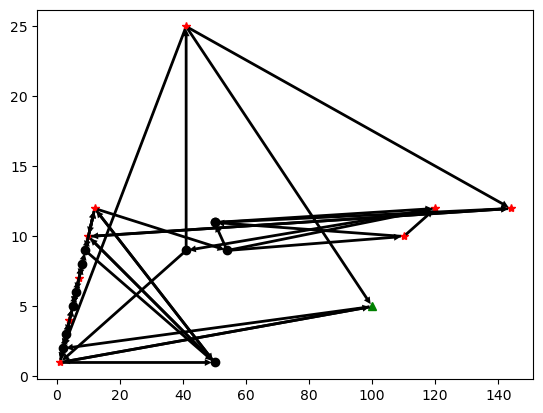

In [27]:
plotGraphPoints(graph)